# PCA

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

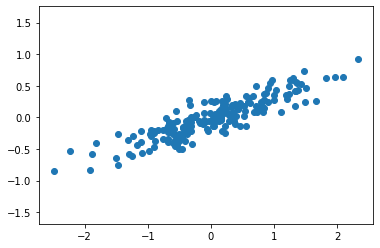

In [ ]:
# PCA 를 위한 자료 준비

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal')

In [ ]:
# 성분(component) : 벡터의 방향
# 설명분산(explained variance) : 해당 벡터의 제곱 길이

from sklearn.decomposition import PCA
mypca = PCA(n_components = 2)
mypca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


In [ ]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(color='red',
                    arrowstyle='simple',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
  ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

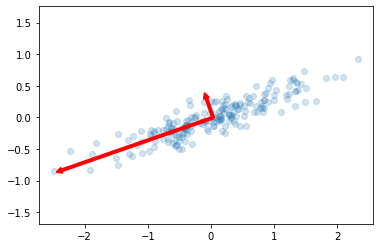

In [ ]:
# data plotting

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_ + v)
plt.axis('equal')

In [ ]:
# 차원 축소에 응용. 가장 작은 주성분 중 하나를 삭제해 최대 데이터 분산을 보존하는 더 작은 차원으로 데이터를 사영
dimpca = PCA(n_components=1)
dimpca.fit(X)
X_pca = dimpca.transform(X)
print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

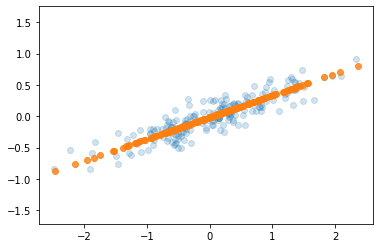

In [ ]:
# 자료출력 역변환
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

얼굴특징 추출

In [ ]:
# 고유 얼굴 성분 찾기
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

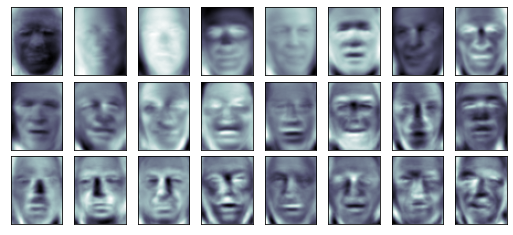

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47), cmap='bone')